<a href="https://colab.research.google.com/github/bharathpreetham/EDA-on-haberman-dataset/blob/master/haberman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

    100% |████████████████████████████████| 993kB 20.2MB/s 
Uploaded file with ID 1skIb8WnCbxusVEdiFTwJpd4jGYRDny_A


In [2]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'BHARATH'})
uploaded.SetContentString('Im tall')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1gyQuy6OMhizuy0y6MMMk08rOszVMRRSU


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1YJzytNcpvROyRBGC_lRt_nUezp0dczae'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))
#https://drive.google.com/open?id=1YJzytNcpvROyRBGC_lRt_nUezp0dczae

In [0]:
downloaded.GetContentFile('haberman.csv')

In [5]:
!ls

adc.json  haberman.csv	sample_data


In [0]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [7]:
df = pd.read_csv('haberman.csv')
df.head()

,age,operation_year,axil_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
df.columns

Index(['age', 'operation_year', 'axil_nodes', 'status'], dtype='object')

In [9]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [0]:
df.plot(kind = 'scatter',x = 'axil_nodes', y = 'age')  #scatterplot
plt.show()

**Obervation 1:
From the above scatter plots we can infer that most the patients dont have axil_nodes (i.e axil_nodes  =0 )and very few patients have axil_nodes above 30**

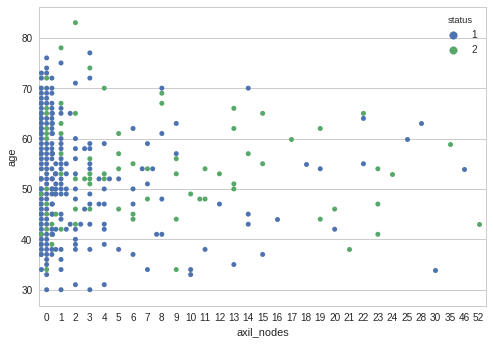

In [25]:
sb.swarmplot(x = 'axil_nodes', y = 'age', data = df,hue = 'status',size = 5)
plt.show()

**observation1:**


*  **From the above plot, we can observe more number of patients have survived more than 5 years  have 0 axil_nodes.**
* **More number of patients have axil_nodes < 5 and very less number of patients having more axil_nodes and in the plot.** 
*  ** U can observe as the number of axial nodes increase the density of patients decreases gradually and patients having axial_nodes above 30 are very few**











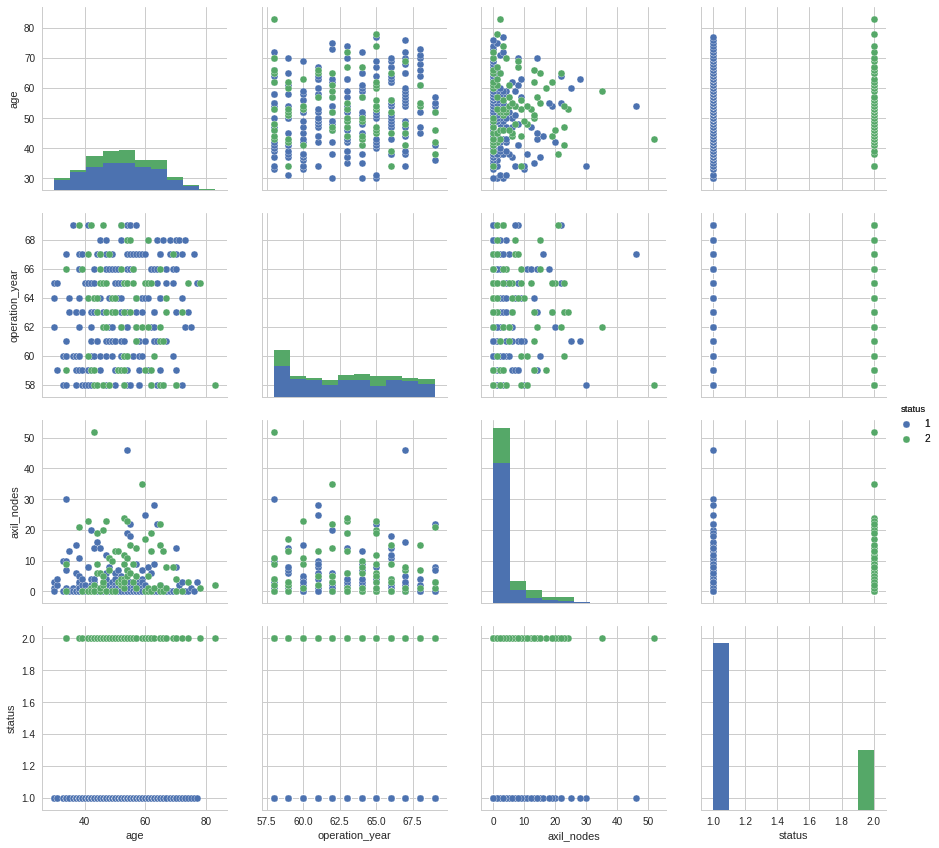

In [22]:
sb.set_style('whitegrid')
sb.pairplot(data = df[['age','operation_year','axil_nodes','status']],hue = 'status',size = 3).add_legend()
plt.show()

**Observations:**

*  **As observed in the swarm plot we can make same observations from the age vs axil_node pairplot.**
*  ** we cannot make any observation on the operation_year vs status from the pair plot since most of the datapoints were overlapped**

In [0]:
dir(sb)

In [26]:
df.describe()

,age,operation_year,axil_nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [0]:
grouped_status = df.groupby('status')
for key,item in grouped_status:
  print(key)
  print(item)

In [0]:
df_gt5 = df.loc[df['status'] == 1]
df_lt5 =df.loc[df['status'] == 2]

In [33]:
df_gt5.describe()

,age,operation_year,axil_nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [36]:
df_lt5.describe()

,age,operation_year,axil_nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0




* **From above we can observe that the maximum number of axil_nodes found in a patient who lived 5 or more years after the operation is 46.**
* **so we can say that the patient having more than 46 axil_nodes died with in 5 years after the operation **
*  ** The patient having age more than 77 years have not survived more than 5 years after the operation**

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


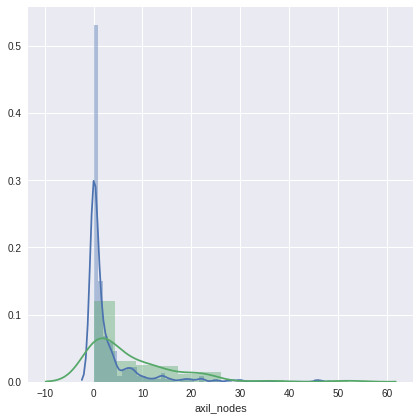

In [0]:
sb.FacetGrid( data = df,hue = 'status',size = 6 ) \
  .map(sb.distplot ,'axil_nodes')
plt.show()

In [0]:
pdf = np.cumsum(pdf)

NameError: ignored